In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
ad_df=pd.read_csv('Downloads\\advertising.csv')

In [5]:
ad_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
ad_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'Radio'}>],
       [<AxesSubplot:title={'center':'Newspaper'}>,
        <AxesSubplot:title={'center':'Sales'}>]], dtype=object)

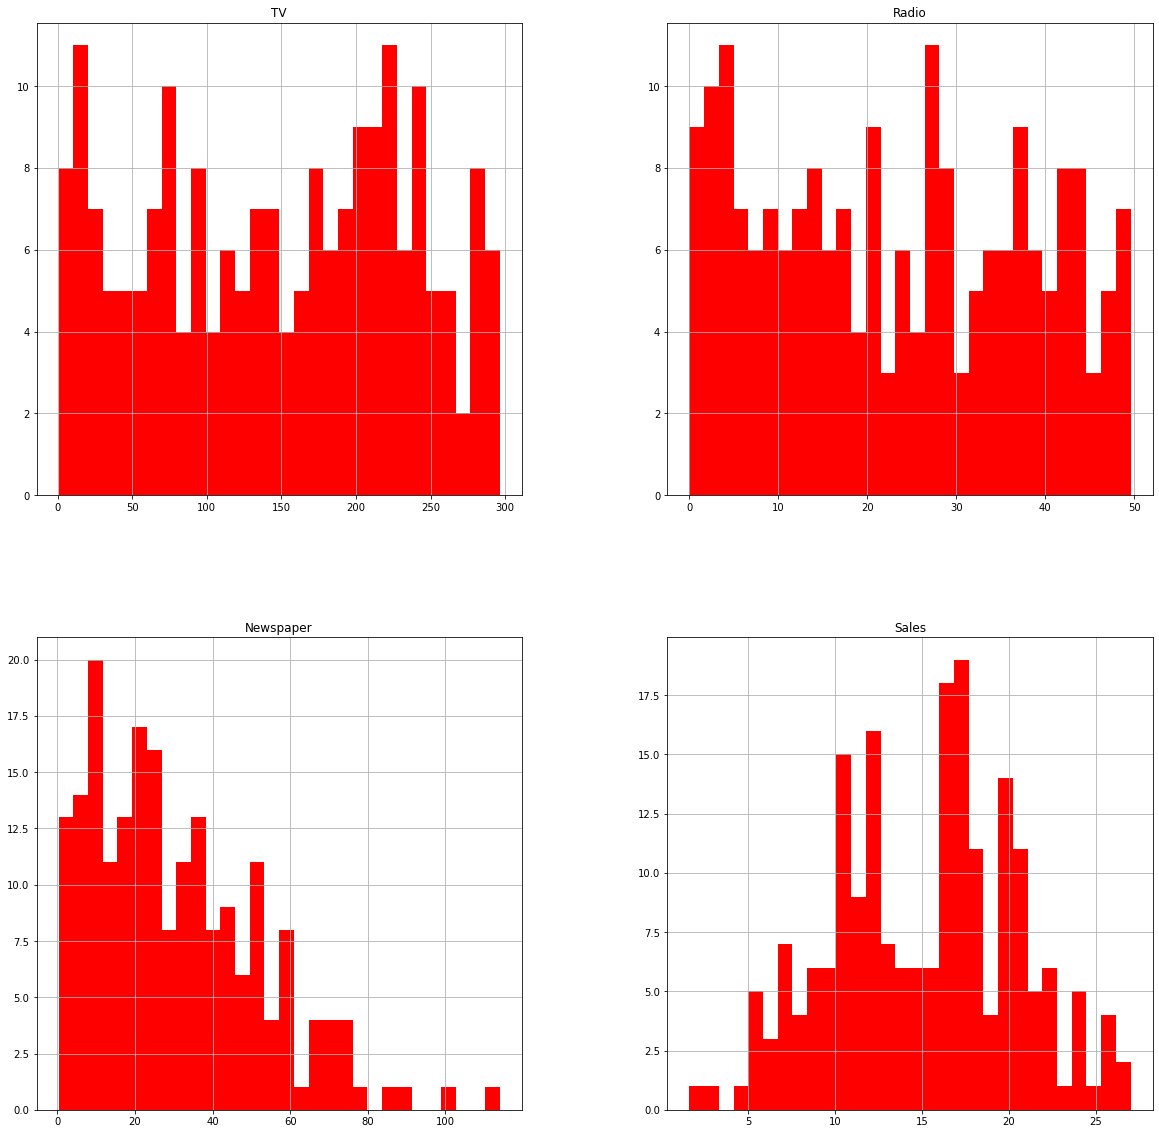

In [8]:
ad_df.hist(bins = 30, figsize = (20, 20), color = 'r')

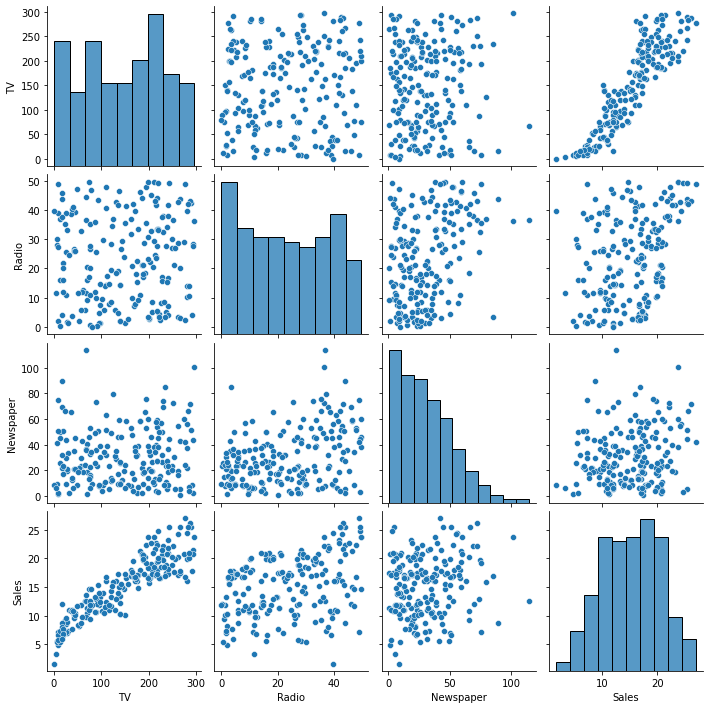

In [9]:
sns.pairplot(ad_df)

<AxesSubplot:>

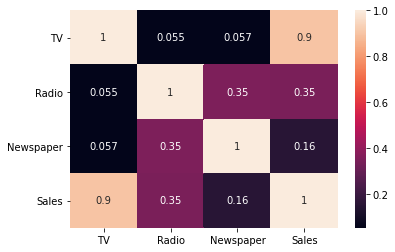

In [10]:
correlations = ad_df.corr()
sns.heatmap(correlations, annot = True)

In [11]:
ad_df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [12]:
X = ad_df[['TV', 'Radio', 'Newspaper']]

In [13]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [14]:
X.shape

(200, 3)

In [15]:
y = ad_df['Sales']

In [16]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [17]:
y.shape

(200,)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
X_train.shape

(160, 3)

In [20]:
X_test.shape

(40, 3)

In [21]:
from sklearn.linear_model import LinearRegression


In [22]:
regressor = LinearRegression(fit_intercept = True)

In [23]:
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
print('Linear Model Coeff (m):', regressor.coef_)
print('Linear Model Coeff(b):', regressor.intercept_)

Linear Model Coeff (m): [0.0546911  0.1036545  0.00152853]
Linear Model Coeff(b): 4.64541308585053


In [25]:
y_predict = regressor.predict(X_test)
y_predict

array([17.95251976, 13.92122425, 18.18670729, 24.94146451,  8.9293587 ,
       15.88092987,  9.795879  , 18.88641768, 17.30146415, 16.93281065,
       13.34320169, 13.26864213, 18.92319905, 20.83077019,  7.92743073,
        7.09125715, 20.20406069, 14.10988052, 20.05307105, 15.2995067 ,
       13.82602187, 11.13698515, 14.61090593, 11.22172551, 15.00469333,
       14.81614708, 17.33054807, 10.91751626, 20.56186523, 19.31082813,
       15.46599456, 18.8814138 , 20.49639216, 17.08706747, 17.11803213,
       18.26030502,  7.13922833, 20.9820909 , 19.54280179, 18.09958517])

In [26]:
y_test

165    16.9
37     14.7
153    16.0
183    26.2
117     9.4
171    17.5
149    10.1
74     17.0
3      16.5
95     16.9
63     14.0
7      13.2
23     20.5
84     21.7
132     5.7
22      5.6
142    20.1
57     13.2
178    16.8
197    14.8
114    14.6
51     10.7
173    16.7
1      10.4
87     16.0
177    16.7
100    16.7
82     11.3
185    22.6
139    20.7
118    15.9
11     17.4
68     18.9
105    15.0
154    20.6
113    20.9
195     7.6
35     17.8
20     18.0
187    17.3
Name: Sales, dtype: float64

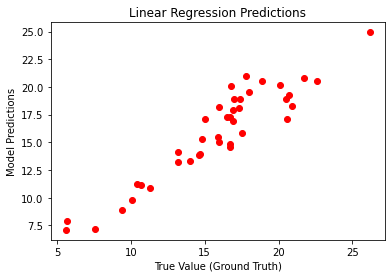

In [27]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Value (Ground Truth)')
plt.title('Linear Regression Predictions')
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
MAPE = np.mean( np.abs( (y_test - y_predict) / y_test ) ) * 100

In [29]:
print('RMSE =', RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nMean Absolute Percentage Error =', MAPE, '%')

RMSE = 1.553 
MSE = 2.4121226899923314 
MAE = 1.2798703347373102 
Mean Absolute Percentage Error = 8.665895629820131 %
